In [1]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 92kB 4.6MB/s 
     |████████████████████████████████| 144.4MB 78kB/s 
     |████████████████████████████████| 256kB 46.3MB/s 
     |████████████████████████████████| 921kB 47.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=d53bf4377c23109881608ef27635d9dc9e943daa4308ebfceccadfd38e2aca7f
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

In [0]:
import time

In [2]:
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.2.0


In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-09 06:05:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   205MB/s    in 0.3s    

2020-05-09 06:05:17 (205 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.42.jpg', 'cat.120.jpg', 'cat.746.jpg', 'cat.706.jpg', 'cat.478.jpg', 'cat.634.jpg', 'cat.212.jpg', 'cat.777.jpg', 'cat.52.jpg', 'cat.968.jpg']
['dog.313.jpg', 'dog.781.jpg', 'dog.62.jpg', 'dog.205.jpg', 'dog.513.jpg', 'dog.797.jpg', 'dog.860.jpg', 'dog.30.jpg', 'dog.227.jpg', 'dog.962.jpg']


In [7]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

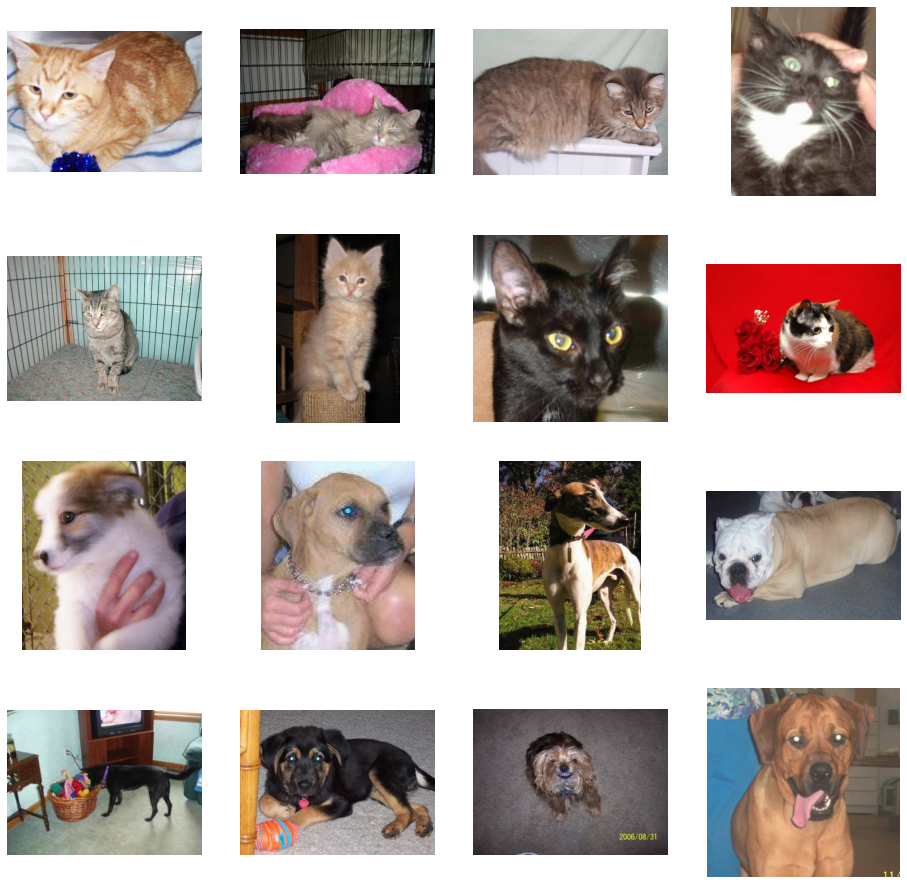

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 58s - loss: 0.7700 - accuracy: 0.5725 - val_loss: 0.6610 - val_accuracy: 0.6320
Epoch 2/15
100/100 - 61s - loss: 0.6278 - accuracy: 0.6550 - val_loss: 0.6883 - val_accuracy: 0.6100
Epoch 3/15
100/100 - 58s - loss: 0.5418 - accuracy: 0.7290 - val_loss: 0.5614 - val_accuracy: 0.7210
Epoch 4/15
100/100 - 58s - loss: 0.4449 - accuracy: 0.7870 - val_loss: 0.6335 - val_accuracy: 0.6900
Epoch 5/15
100/100 - 58s - loss: 0.3575 - accuracy: 0.8350 - val_loss: 0.5729 - val_accuracy: 0.7360
Epoch 6/15
100/100 - 58s - loss: 0.2701 - accuracy: 0.8885 - val_loss: 0.6362 - val_accuracy: 0.7330
Epoch 7/15
100/100 - 58s - loss: 0.1870 - accuracy: 0.9285 - val_loss: 0.9226 - val_accuracy: 0.7070
Epoch 8/15
100/100 - 58s - loss: 0.1307 - accuracy: 0.9485 - val_loss: 0.8631 - val_accuracy: 0.7380
Epoch 9/15
100/100 - 58s - loss: 0.1016 - accuracy: 0.9635 - val_loss: 1.0138 - val_accuracy: 0.7130
Epoch 10/15
100/100 - 58s - loss: 0.1039 - accuracy: 0.9755 - val_loss: 1.0614 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

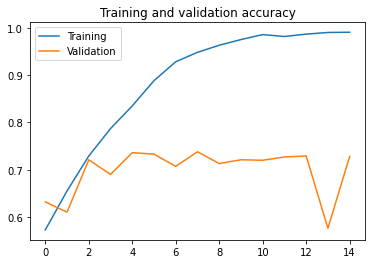

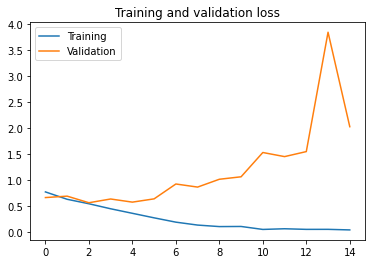

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [0]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [19]:
saved_model_path

'./1589005338.h5'

In [0]:
!mkdir submission

In [0]:
# EXERCISE: Use the tensorflow.js converter to convert the saved Keras model into JSON format.

!tensorflowjs_converter --input_format=keras /content/1589005338.h5 /content/submission/

In [33]:
!ls /content/submission/

group1-shard10of10.bin	group1-shard4of10.bin  group1-shard8of10.bin
group1-shard1of10.bin	group1-shard5of10.bin  group1-shard9of10.bin
group1-shard2of10.bin	group1-shard6of10.bin  model.json
group1-shard3of10.bin	group1-shard7of10.bin


In [38]:
!zip -jrm submission.zip /content/submission/

  adding: group1-shard2of10.bin (deflated 7%)
  adding: group1-shard10of10.bin (deflated 7%)
  adding: group1-shard1of10.bin (deflated 7%)
  adding: group1-shard3of10.bin (deflated 7%)
  adding: group1-shard7of10.bin (deflated 7%)
  adding: group1-shard8of10.bin (deflated 7%)
  adding: model.json (deflated 82%)
  adding: group1-shard5of10.bin (deflated 7%)
  adding: group1-shard9of10.bin (deflated 7%)
  adding: group1-shard6of10.bin (deflated 7%)
  adding: group1-shard4of10.bin (deflated 7%)
